# Random Forest

## 1. Explanation of the algorithm

Random Forest is an algorithm invented in 1995 which is based on decision trees which were invented in the 60s. 
To understand how Random Forest, first we have to understand how decisions trees work.

We give to the decision tree algorithm a set of datas, for exemple the position of the cheese in a maze. Each square of the maze is a boolean variable : 1 if there is a cheese on it and zero if there is not. By testing the dataset, the algorithm is going test the Gini impurity factor on every variables : this gini impurity factor determine which variable better divide the dataset in classes. The variable with the lower gini impurity factor will be higher in the tree. By doing it again and again the algorithm build a tree like that : 

![DecisionTree](Image0.png)

When we are at the bottom of the tree : the leaf nodes, we have the answer to our question. 
The problem with decision trees is that they don't work very well. Here come the Random Forest. Random Forest are an aggregation of decision trees. By taking random sample population of the original dataset, the random forest algorithm build a lot of decisions trees in the same way we saw above

![RandomForest](Image2.png)

Instead of taking the decision with only one decision tree, the random forest algorithm is going to take the decision depending on the majority of all the decision tree it built : 

![RandomForest](Image3.png)

-> This is how Random Forest work.

Sources :

StatQuest : Decision Trees
https://www.youtube.com/watch?v=7VeUPuFGJHk&t=95s

StatQuest : Random Forest
https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

## 2. Influence of parameters and hyperparameters : test on simulated datas

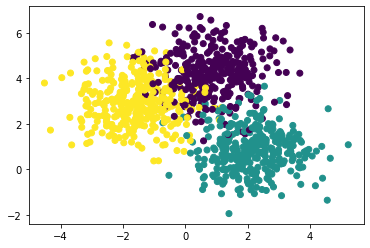

In [30]:
#Simulating datas
from sklearn.datasets import make_blobs
import numpy as np
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
#Show the simulated datas
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
# Dividing the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [6]:
#Testing the random forest classifier on it with 1000 decisions trees
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.915


### 2.1. Testing the influence of different parameters on the result

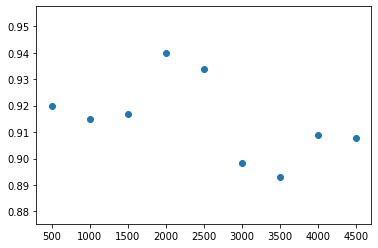

In [41]:
#size of the dataset
accuracy = list()
sample_range = range(500,5000,500)
for n in sample_range:
    X, y = make_blobs(n_samples=n, centers=3, n_features=2, random_state=0)
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
    clf=RandomForestClassifier(n_estimators = 100)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.scatter(sample_range,accuracy)

We see that the best result is at 500. So there is no need to have a to much sample to have a good prediction in our case contrarly to what we imagine about machine learning 

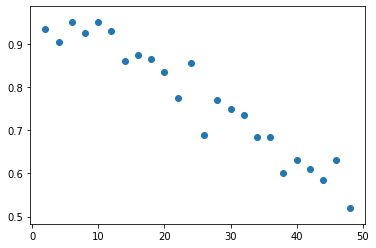

In [42]:
#number of centers
accuracy = list()
center_range = range(2,50,2)
for n in center_range:
    X, y = make_blobs(n_samples=1000, centers=n, n_features=2, random_state=0)
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
    clf=RandomForestClassifier(n_estimators = 100)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.scatter(center_range,accuracy)

As expected, the more number of centers we have, the worst is the result. However we see that we can have 80% of accuracy with 20 centers so the algorithm is very peforming

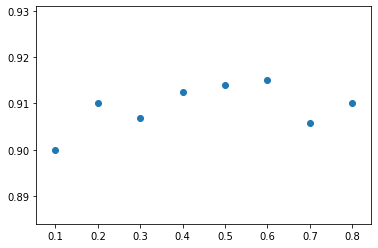

In [43]:
#training testing cut
accuracy = list()
cut_range = np.arange(0.1,0.9,0.1)
for n in cut_range:
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=n, random_state=0)
    clf=RandomForestClassifier(n_estimators = 100)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.scatter(cut_range,accuracy)

The best result is at 50 percent of training and testing. This result is diffent from what we can read about the best slicing but we can say that it's specific to the dataset

### 2.2. Testing the influence of hyperparamters on the accuracy 

I change the hyperparameters I want to test and let the others by default

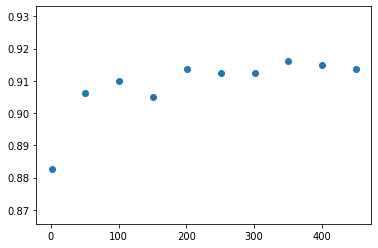

In [44]:
#n_estimators
accuracy = list()
n_estimators_range = range(1,500,50)
for n in n_estimators_range:
    clf=RandomForestClassifier(n_estimators=n)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    # Model Accuracy, how often is the classifier correct?
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.scatter(n_estimators_range,accuracy)

The number of estimator does not have a big influence on the result

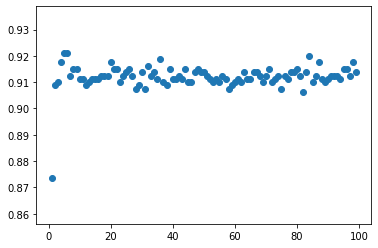

In [45]:
#max_depth
accuracy = list()
max_depth_range = range(1,100)
for n in max_depth_range:
    clf=RandomForestClassifier(n_estimators = 100, max_depth=n)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    # Model Accuracy, how often is the classifier correct?
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.scatter(max_depth_range,accuracy)

We can see that this hyperparameter does not have a big influence on the result

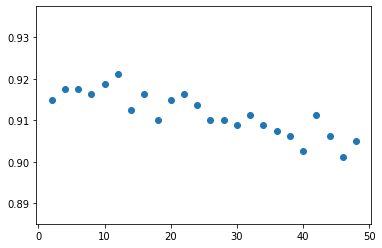

In [46]:
#min_samples_split
accuracy = list()
min_samples_split_range = range(2,50,2)
for n in min_samples_split_range:
    clf=RandomForestClassifier(n_estimators = 100, min_samples_split=n)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    # Model Accuracy, how often is the classifier correct?
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.scatter(min_samples_split_range,accuracy)

We can see that the result change a bit  depending on the hyperparameter min_samples_split so this hyperparameter must be tested well

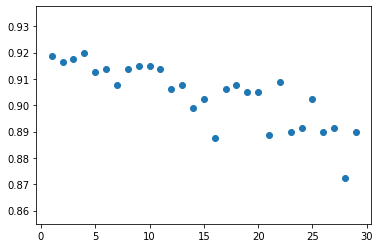

In [47]:
#min_samples_leaf
accuracy = list()
min_samples_leaf_range = range(1,30)
for n in min_samples_leaf_range:
    clf=RandomForestClassifier(n_estimators=100,min_samples_leaf=n)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    # Model Accuracy, how often is the classifier correct?
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.scatter(min_samples_leaf_range,accuracy)

We can see that the result change a lot depending on the hyperparameter min_samples_leaf so this hyperparameter must be tested well

I'm not going to test all the hyperparameters because there are many. We see that tuning hyperparameters has a big influence on result. We tested to change the hyperparameters one by one but the objective would be to find the best combination of these hyperparameters. There are solution to do it like the Grid search, the random search or the hyperoptimizer.

CONCLUSION ABOUT THE TESTS

All these tests are very specific to the dataset we used, but we see that some of them can have a big influence on the final result. So we can conclude that it's very important to spend of lot of time testing the possibilities.

## 3. Random Forest on Pyrat

The dataset is made with mazes of mazeHeight = 8, mazeWidth = 10 and number_of_cheeses = 10 using the script available in the TP

In [49]:
# Loading the datas
filename = "dataX.npz"
loaded_npz = np.load(filename)
x = loaded_npz['data']
filename = "dataY.npz"
loaded_npz = np.load(filename)
y = loaded_npz['data']

In [62]:
#Slicing into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=0)

In [64]:
#Trying to predict who has won with random forest based on a maze dataset
clf=RandomForestClassifier(n_estimators=1000)
#We use the default hyperparameters
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.5175


We can see that the results are not very good : almost like a random result

Testing Set:
              precision    recall  f1-score   support

        -1.0       0.56      0.66      0.61       152
         0.0       0.21      0.04      0.07        98
         1.0       0.51      0.68      0.58       150

    accuracy                           0.52       400
   macro avg       0.43      0.46      0.42       400
weighted avg       0.45      0.52      0.47       400

[[101   6  45]
 [ 41   4  53]
 [ 39   9 102]]


Text(0, 0.5, 'Predicted class')

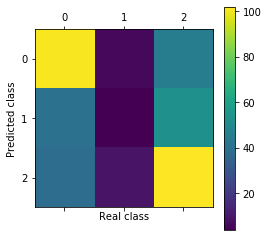

In [67]:
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
report = classification_report(y_true=y_test,y_pred=y_pred)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
print("Testing Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

We can see that the algorithm predict very badly the even score. For the two other classes, result are about the same and they are not very good.

I think that it does not work very well because the variables with the position of the cheese are not a very good variable. To have better result, we would add some other variables for example the position of the rat and the python at the beggining of the game